Kolom dalam dataset: Index(['ï»¿Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
  ï»¿Loan_ID Gender Married Dependents     Education Self_Employed  \
0   LP001002   Male      No          0      Graduate            No   
1   LP001003   Male     Yes          1      Graduate            No   
2   LP001005   Male     Yes          0      Graduate           Yes   
3   LP001006   Male     Yes          0  Not Graduate            No   
4   LP001008   Male      No          0      Graduate            No   

   ApplicantIncome CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                 0         NaN             360.0   
1             4583              1508       128.0             360.0   
2             3000                 0        66.0             360.0   
3             2583             

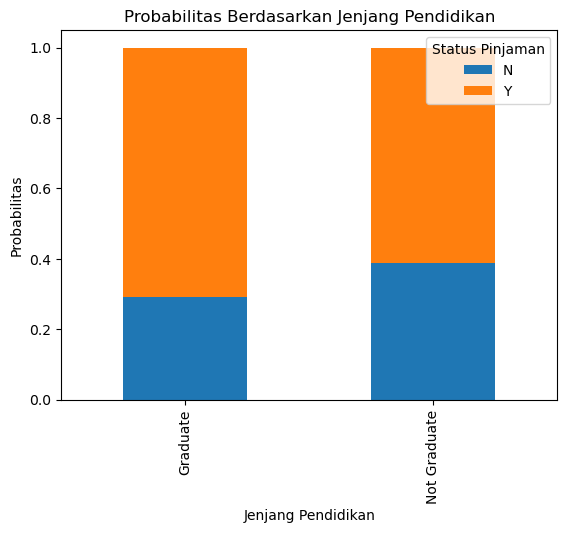

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Muat dataset
file_path = "C:/Drive D/OneDrive/Dokumen/loan_data_set.csv"  # Sesuaikan lokasi file Anda
df = pd.read_csv(file_path, encoding='windows-1254', delimiter=',')

# Periksa nama kolom dan tampilkan baris awal data
print("Kolom dalam dataset:", df.columns)
print(df.head())

# a. Nasabah sudah menikah dan memiliki tanggungan > 1
if 'Married' in df.columns and 'Dependents' in df.columns:
    married_dependents = df[(df['Married'] == 'Yes') & (df['Dependents'].isin(['2', '3+']))]
    prob_a = len(married_dependents) / len(df)
    print(f"Probabilitas nasabah sudah menikah dan memiliki tanggungan > 1: {prob_a:.2f}")
else:
    print("Kolom 'Married' atau 'Dependents' tidak ditemukan.")

# b. Nasabah memiliki rumah di kawasan perkotaan dan penghasilan di atas rata-rata
if 'ApplicantIncome' in df.columns and 'Property_Area' in df.columns:
    average_income = df['ApplicantIncome'].mean()
    urban_income = df[(df['Property_Area'] == 'Urban') & (df['ApplicantIncome'] > average_income)]
    prob_b = len(urban_income) / len(df)
    print(f"Probabilitas nasabah memiliki rumah di perkotaan dan penghasilan di atas rata-rata: {prob_b:.2f}")
else:
    print("Kolom 'ApplicantIncome' atau 'Property_Area' tidak ditemukan.")

# c. Visualisasi distribusi probabilitas berdasarkan kategori jenjang pendidikan
if 'Education' in df.columns and 'Loan_Status' in df.columns:
    edu_group = df.groupby('Education')['Loan_Status'].value_counts(normalize=True).unstack()
    edu_group.plot(kind='bar', stacked=True)
    plt.title("Probabilitas Berdasarkan Jenjang Pendidikan")
    plt.xlabel("Jenjang Pendidikan")
    plt.ylabel("Probabilitas")
    plt.legend(title="Status Pinjaman")
    plt.show()
else:
    print("Kolom 'Education' atau 'Loan_Status' tidak ditemukan.")